# 1. import data and visualization libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
matplotlib.__version__ # to check the matplotlib version

'3.7.2'

In [8]:
# Including the command for inline plotting
%matplotlib inline

In [9]:
# define path

PATH = 'Data'

In [11]:
# import data
df= pd.read_csv(os.path.join(PATH, 'Origional Data', 'real_estate.csv'))

In [12]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# 2. Data Cleaning


In [13]:
df.shape

(414, 8)

In [15]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

## column renaming

In [17]:
# rename the column whose name is long
df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 
                     'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops',
                     'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' },
                      inplace = True)


In [18]:
df.columns

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit'],
      dtype='object')

In [19]:
df.dtypes


No                  int64
Date              float64
House age         float64
D. metro          float64
N. shops            int64
Latitude          float64
Longitude         float64
Price per unit    float64
dtype: object

In [20]:
df.head()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Missing value value

In [21]:
df.isnull().sum() # no missing vaule

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

## duplicate value check

In [23]:

df_dups = df[df.duplicated()]# no duplicates value

In [24]:
df_dups

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit


In [26]:
df_dups.shape #it shows the duplicates value in left and column no in right

(0, 8)

## Mixed_type data check

In [27]:
# no mixed-value because no result after run

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

# 3.Exploring relationship

## Correlation

### Create a correlation heatmap using matplotlib

In [28]:
# to check the correlations 
df.corr()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
D. metro,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
N. shops,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price per unit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


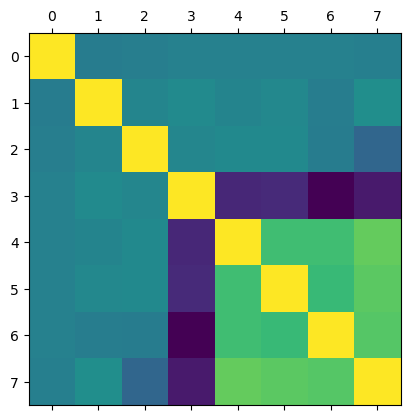

In [29]:

# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

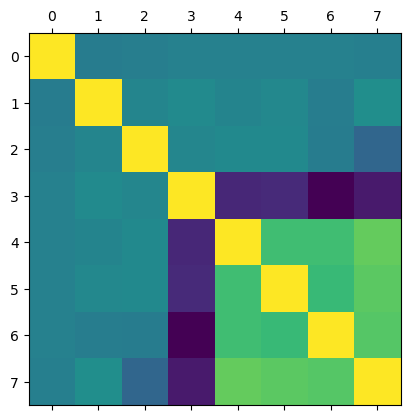

In [30]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [31]:
#current dir
cwd = os.getcwd()
cwd

'/Users/sonaliavinash/Documents/Netflix_data'

Text(0.5, 1.0, 'Correlation Matrix')

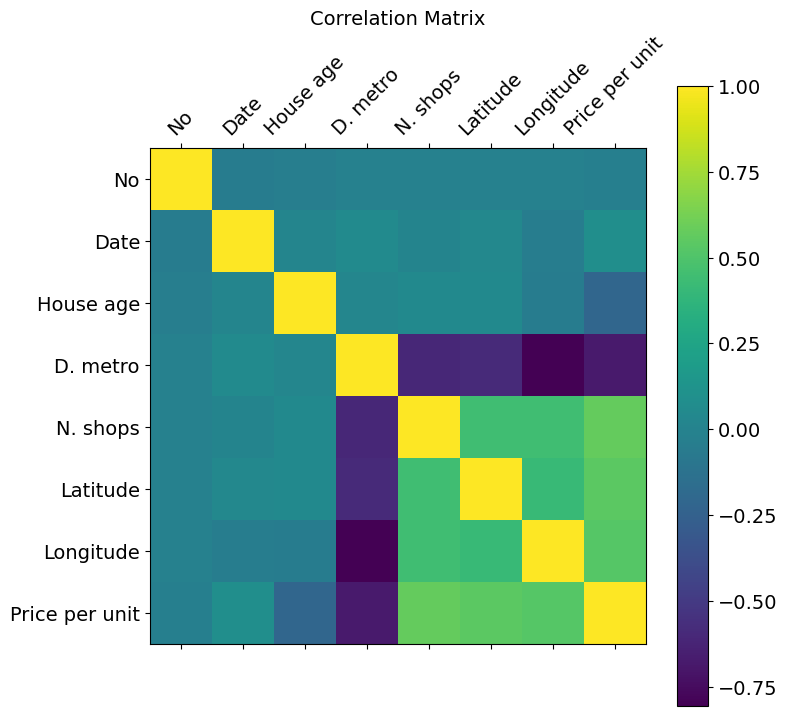

In [32]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Create a correlation heatmap using seaborn

In [33]:
df.columns

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit'],
      dtype='object')

In [34]:
# create a subset to exclude No and Date

sub= df[['House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit']]

In [35]:
sub

,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


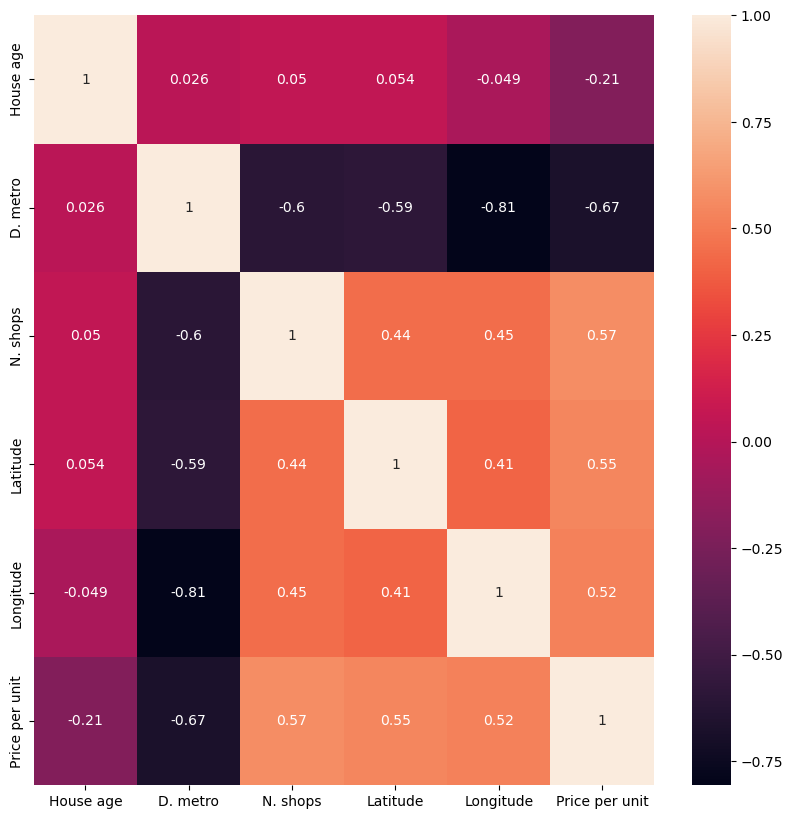

In [36]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.